In [1]:
from data_storage import data_storage
from data_analyze import data_analyze

from statsmodels.tsa import stattools
from statsmodels.stats.diagnostic import unitroot_adf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\chang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import warnings

warnings.filterwarnings('ignore')

### Processing Data 

In [3]:
#creating objects
stor = data_storage('crypto_base.sqlite')
analyst = data_analyze()

In [4]:
#creating dict for storage df
df_map = {} # store initial df directly from SQLITE
test_df_map = {} #store modified df for further analyze

In [5]:
#fetching 8 stablecoins data in 3 freqs
table_names = []
for coin in ['DAI', 'GUSD', 'USDT', 'USDS', 'USDC', 'PAX', 'TUSD', 'BTC']:
    for freq in ['m','h','d']:
        table_name = str('price_{}_USD_{}'.format(coin, freq))
        table_names.append( table_name )
        df_map[table_name] = stor.dump_data(table_name) 

In [6]:
#store df_map into analyst obj
for key in df_map.keys():
    analyst.adding_df( df_map[key] )

#modified df in df_map for further analyze, then create new attribute 'test_df_list', store in analyst obj
analyst.covert_to_test_df()

#extract data in 'test_df_list' to form new local map, 'test_df_map'
test_df_map = dict( zip(table_names, analyst.test_df_list) )


### Adjust test_map_df, remove abnormal std time period

In [7]:
test_df_map['price_GUSD_USD_h'] = test_df_map['price_GUSD_USD_h'][test_df_map['price_GUSD_USD_h'].index > '2019-01-01']
test_df_map['price_USDT_USD_h'] = test_df_map['price_USDT_USD_h'][test_df_map['price_USDT_USD_h'].index > '2017-07-01']
test_df_map['price_PAX_USD_h'] = test_df_map['price_PAX_USD_h'][test_df_map['price_PAX_USD_h'].index > '2019-02-01']

### Daily rolling mean & std


price_DAI_USD_h 
Daily rolling mean & std. 



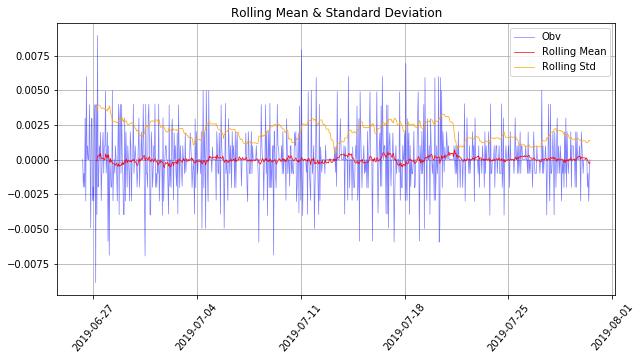

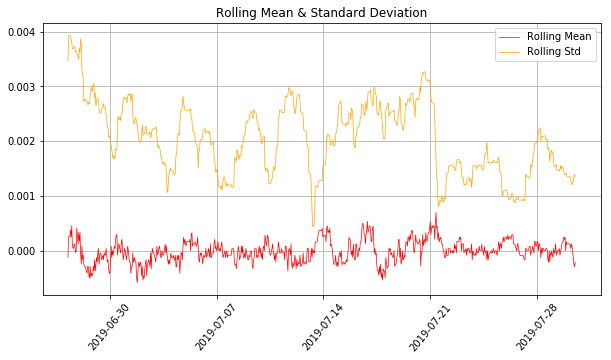


price_GUSD_USD_h 
Daily rolling mean & std. 



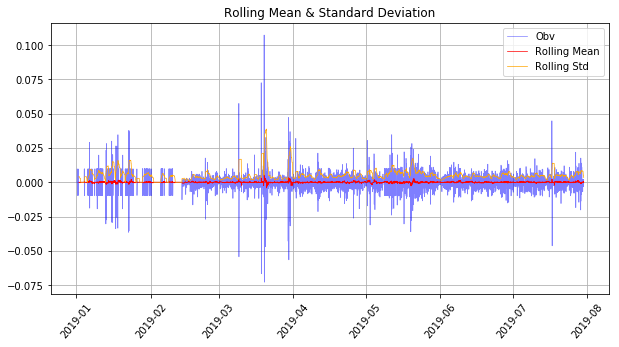

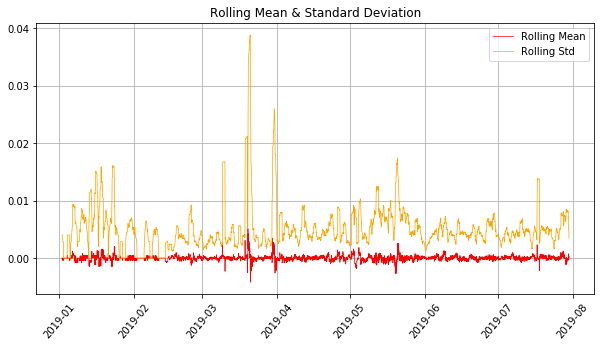


price_USDT_USD_h 
Daily rolling mean & std. 



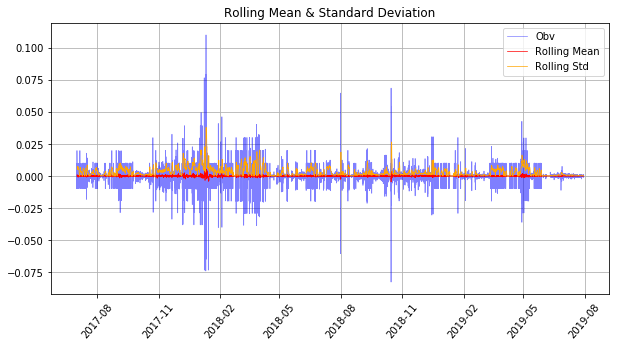

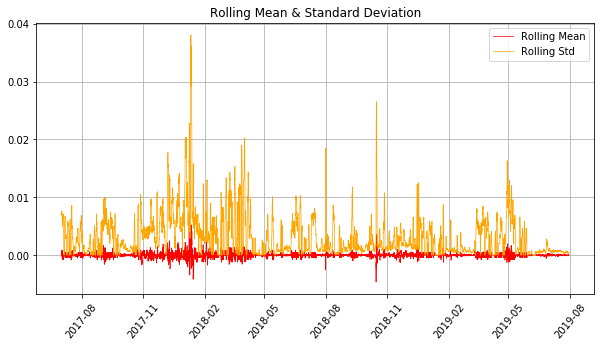


price_USDS_USD_h 
Daily rolling mean & std. 



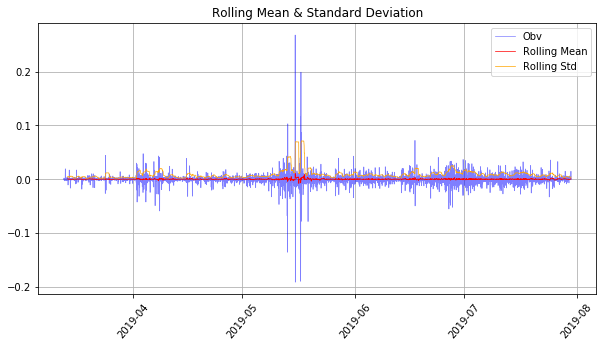

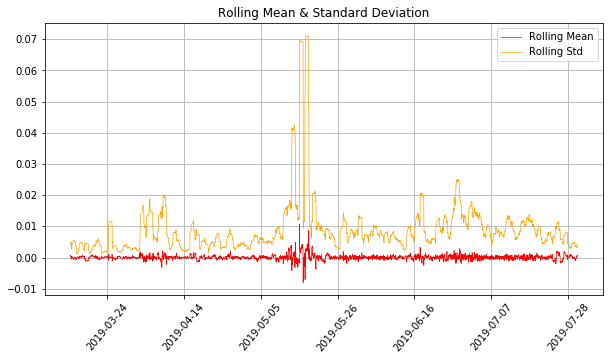


price_USDC_USD_h 
Daily rolling mean & std. 



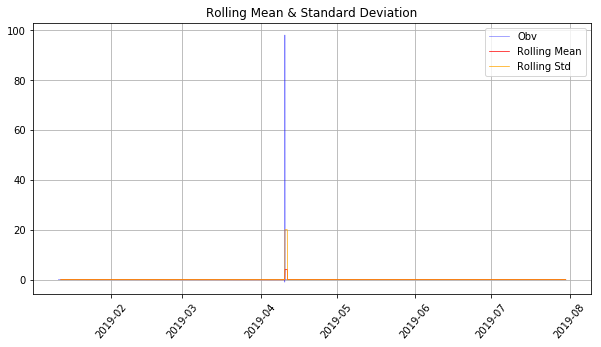

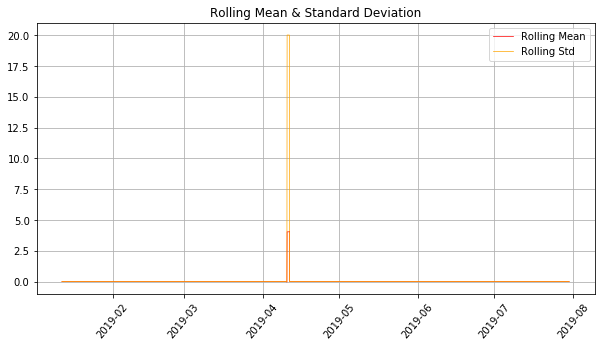


price_PAX_USD_h 
Daily rolling mean & std. 



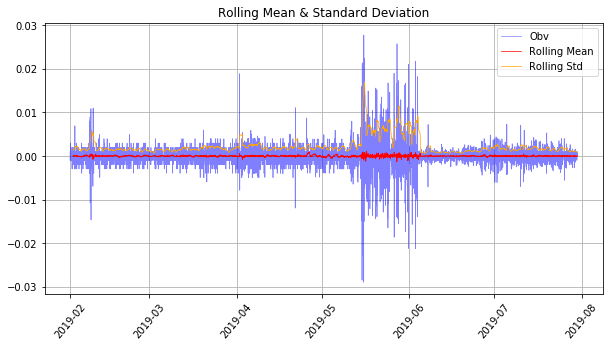

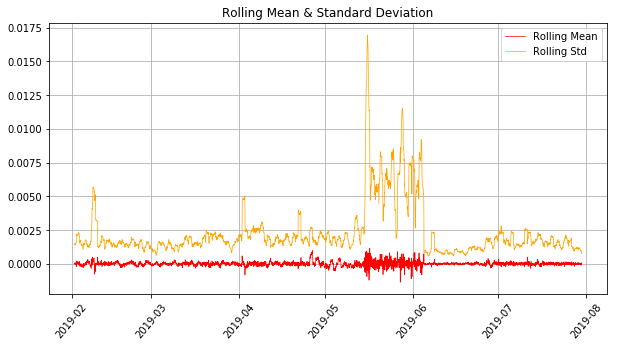


price_TUSD_USD_h 
Daily rolling mean & std. 



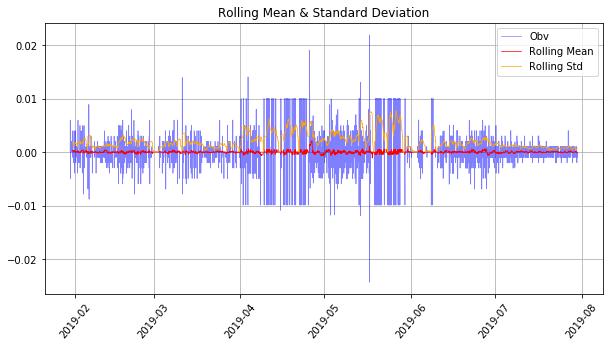

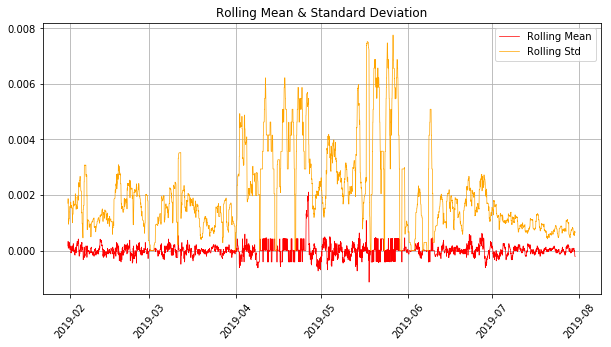


price_BTC_USD_h 
Daily rolling mean & std. 



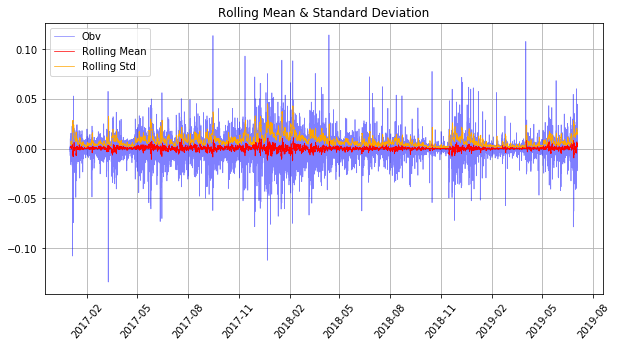

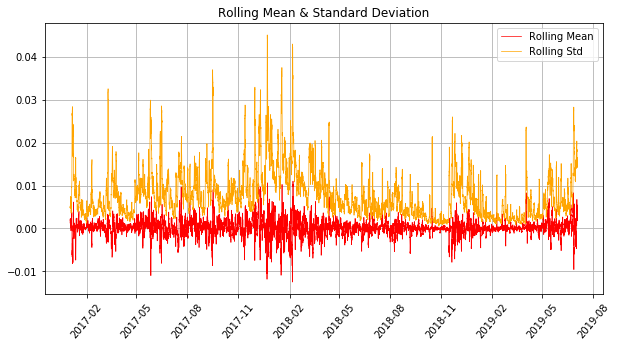

In [8]:
for name in table_names:
    if name[-1] == 'h':
        print('\n{} \nDaily rolling mean & std. \n'.format(name))
        a = analyst.rolling_mean_std(test_df_map[ name ],True)

### Stationary_hour level

------------------------
price_DAI_USD_h 



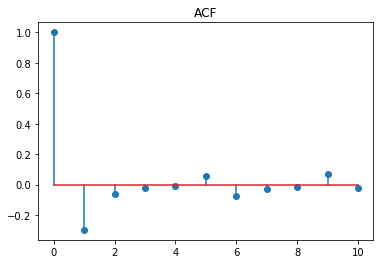

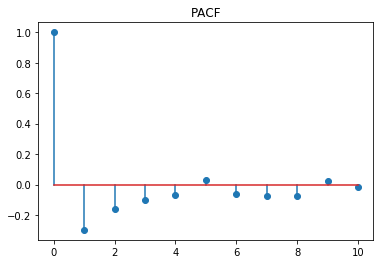

Drop H0, no unit root in 1% alpha
stat =  -8.19161166803
p_val =  7.64104631383e-13
alpha_threshold: {'1%': -3.4385299921076995, '5%': -2.8651505256266865, '10%': -2.5686925716879871}
------------------------
------------------------
price_GUSD_USD_h 



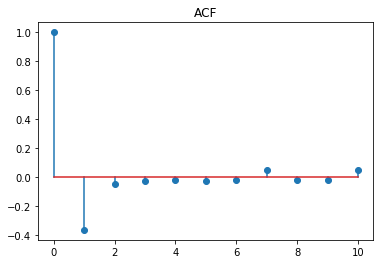

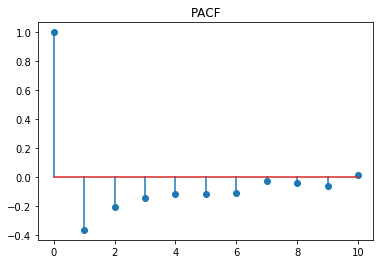

Drop H0, no unit root in 1% alpha
stat =  -19.1791301374
p_val =  0.0
alpha_threshold: {'1%': -3.4316522779278373, '5%': -2.8621154666284063, '10%': -2.5670763214801435}
------------------------
------------------------
price_USDT_USD_h 



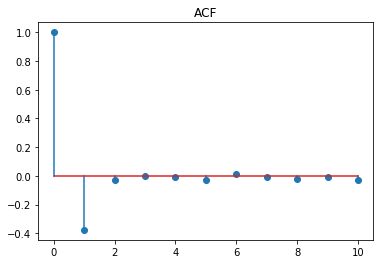

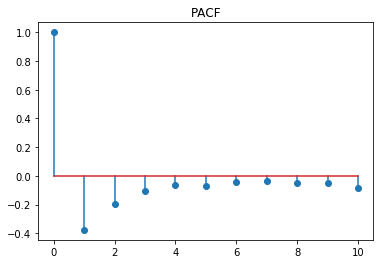

Drop H0, no unit root in 1% alpha
stat =  -23.4557496297
p_val =  0.0
alpha_threshold: {'1%': -3.4307096889077844, '5%': -2.8616989689806949, '10%': -2.5668546149966978}
------------------------
------------------------
price_USDS_USD_h 



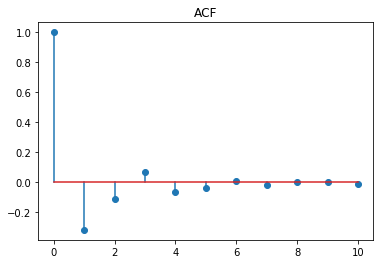

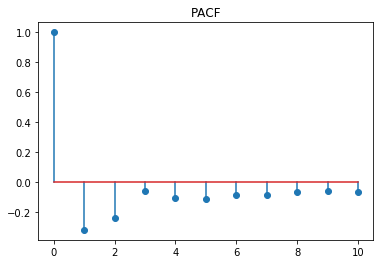

Drop H0, no unit root in 1% alpha
stat =  -16.7603825049
p_val =  1.3116507976e-29
alpha_threshold: {'1%': -3.4323200060740411, '5%': -2.8624104329204227, '10%': -2.567233349059288}
------------------------
------------------------
price_USDC_USD_h 



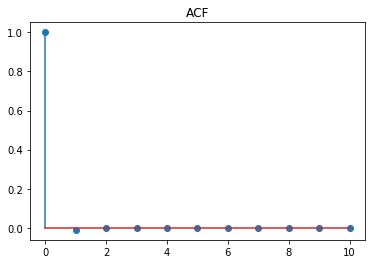

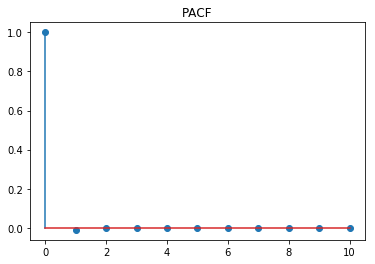

Drop H0, no unit root in 1% alpha
stat =  -70.0361606625
p_val =  0.0
alpha_threshold: {'1%': -3.431711097447145, '5%': -2.8621414525757491, '10%': -2.5670901548483767}
------------------------
------------------------
price_PAX_USD_h 



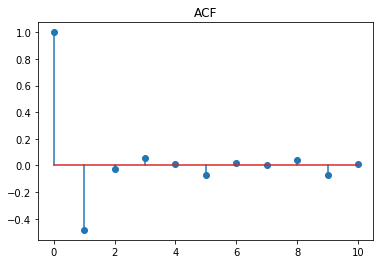

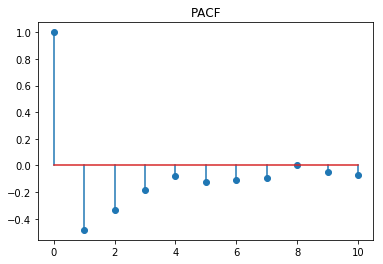

Drop H0, no unit root in 1% alpha
stat =  -17.0045022384
p_val =  8.68049977866e-30
alpha_threshold: {'1%': -3.4318784338660824, '5%': -2.8622153775300201, '10%': -2.5671295085622763}
------------------------
------------------------
price_TUSD_USD_h 



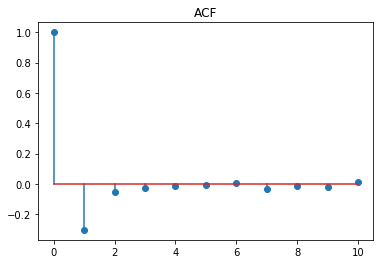

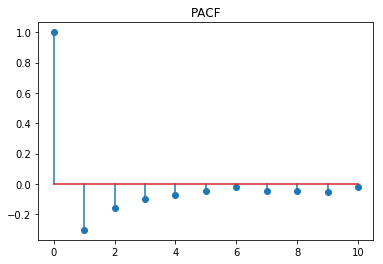

Drop H0, no unit root in 1% alpha
stat =  -15.1629284553
p_val =  6.55187604031e-28
alpha_threshold: {'1%': -3.4318621755499645, '5%': -2.8622081952035137, '10%': -2.5671256850426554}
------------------------
------------------------
price_BTC_USD_h 



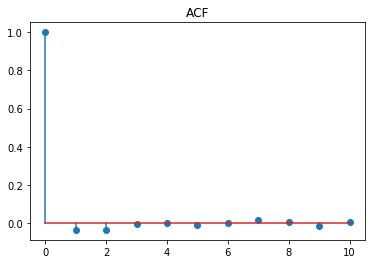

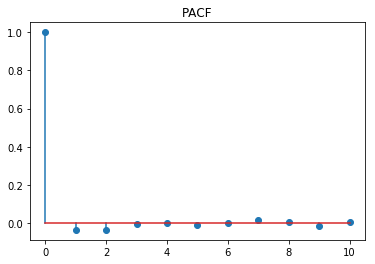

Drop H0, no unit root in 1% alpha
stat =  -29.5147111046
p_val =  0.0
alpha_threshold: {'1%': -3.4306485241176565, '5%': -2.8616719378010846, '10%': -2.5668402267764288}
------------------------


In [9]:
for name in table_names:
    if name[-1] == 'h':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.stationary_test( test_df_map[ name ], True ) ['adf']
        if a[0] < a[4]['1%']:
            print('Drop H0, no unit root in 1% alpha')
        
        print('stat = ', a[0])
        print('p_val = ', a[1])
        print('alpha_threshold:', a[4])
        print('------------------------')



### Stationary_minute level

------------------------
price_DAI_USD_m 



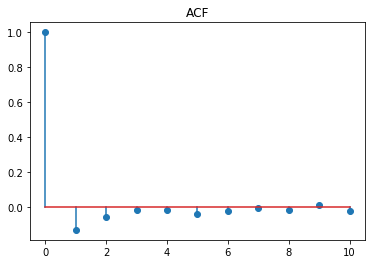

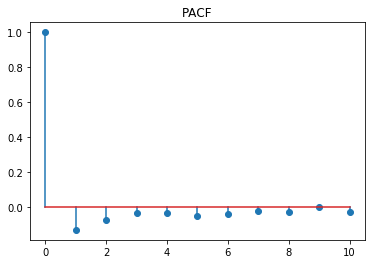

KEEP H0, no unit root in 1% alpha
stat =  -28.7440330896
p_val =  0.0
alpha_threshold: {'1%': -3.4307025717054715, '5%': -2.8616958236315009, '10%': -2.5668529407778204}
------------------------
------------------------
price_GUSD_USD_m 



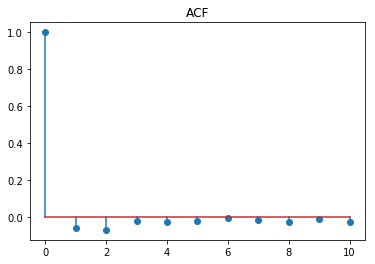

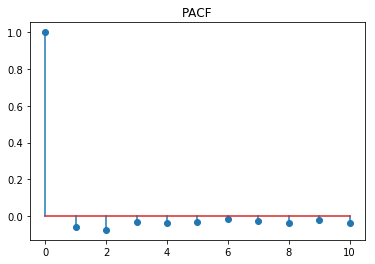

KEEP H0, no unit root in 1% alpha
stat =  -26.2685421431
p_val =  0.0
alpha_threshold: {'1%': -3.4307027048200549, '5%': -2.8616958824597205, '10%': -2.5668529720911253}
------------------------
------------------------
price_USDT_USD_m 



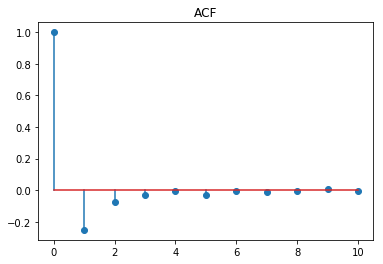

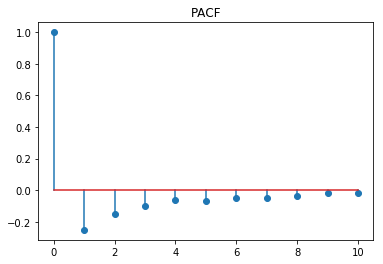

KEEP H0, no unit root in 1% alpha
stat =  -34.2638231151
p_val =  0.0
alpha_threshold: {'1%': -3.4307023247590611, '5%': -2.8616957144968125, '10%': -2.5668528826872015}
------------------------
------------------------
price_USDS_USD_m 



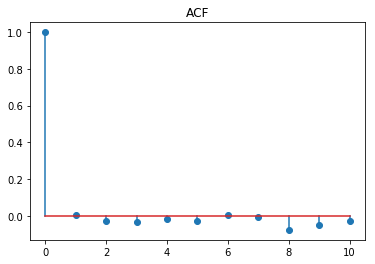

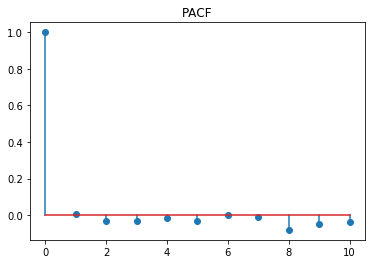

KEEP H0, no unit root in 1% alpha
stat =  -19.6291526637
p_val =  0.0
alpha_threshold: {'1%': -3.4310744611911588, '5%': -2.861860164960083, '10%': -2.5669404187738012}
------------------------
------------------------
price_USDC_USD_m 



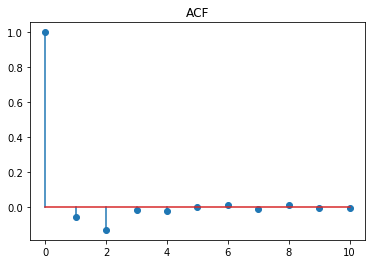

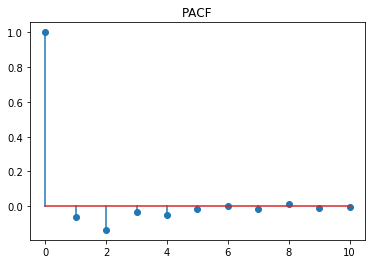

KEEP H0, no unit root in 1% alpha
stat =  -20.4559379433
p_val =  0.0
alpha_threshold: {'1%': -3.4310743809400748, '5%': -2.8618601294986212, '10%': -2.5669403998974749}
------------------------
------------------------
price_PAX_USD_m 



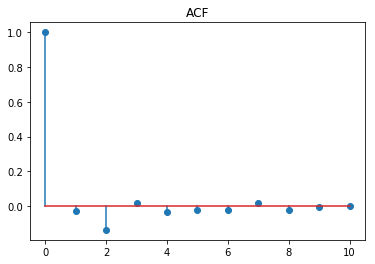

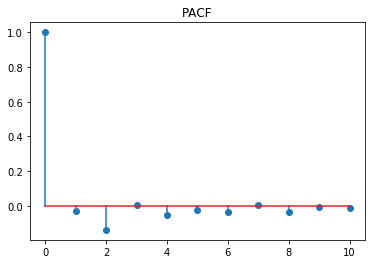

KEEP H0, no unit root in 1% alpha
stat =  -38.0206471483
p_val =  0.0
alpha_threshold: {'1%': -3.4310723006345296, '5%': -2.861859210249952, '10%': -2.5669399105765343}
------------------------
------------------------
price_TUSD_USD_m 



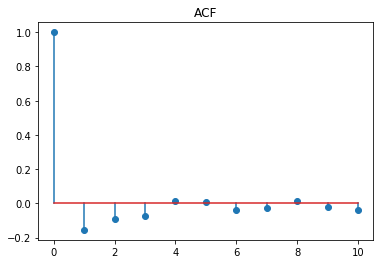

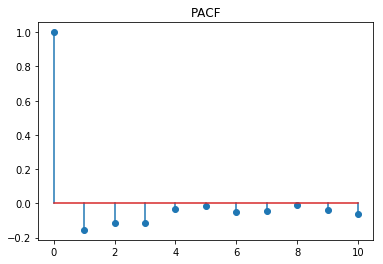

KEEP H0, no unit root in 1% alpha
stat =  -20.6837720219
p_val =  0.0
alpha_threshold: {'1%': -3.4310746217466832, '5%': -2.8618602359065806, '10%': -2.5669404565390028}
------------------------
------------------------
price_BTC_USD_m 



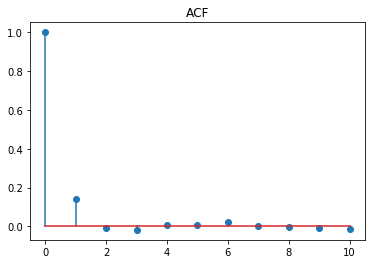

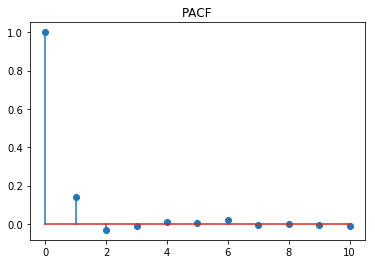

KEEP H0, no unit root in 1% alpha
stat =  -65.6416747755
p_val =  0.0
alpha_threshold: {'1%': -3.4310428375045858, '5%': -2.8618461909669168, '10%': -2.5669329803550514}
------------------------


In [10]:
for name in table_names:
    if name[-1] == 'm':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.stationary_test( test_df_map[ name ], True ) ['adf']
        if a[0] < a[4]['1%']:
            print('KEEP H0, no unit root in 1% alpha')
        
        print('stat = ', a[0])
        print('p_val = ', a[1])
        print('alpha_threshold:', a[4])
        print('------------------------')

### Stationary_daily level

------------------------
price_DAI_USD_d 



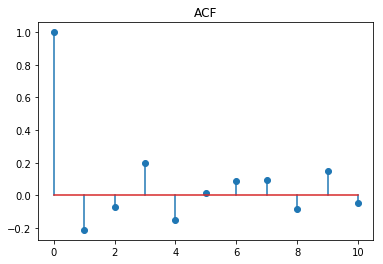

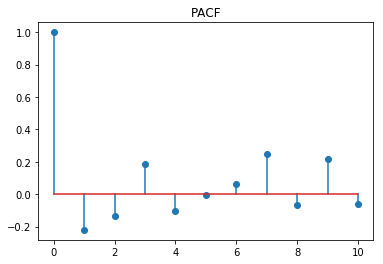

KEEP H0, no unit root in 1% alpha
stat =  -5.9021893868
p_val =  2.76133939773e-07
alpha_threshold: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328003999999998}
------------------------
------------------------
price_GUSD_USD_d 



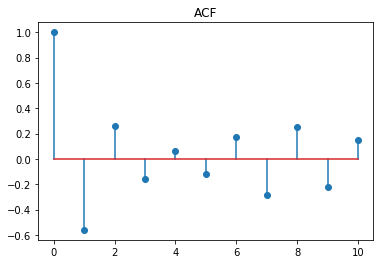

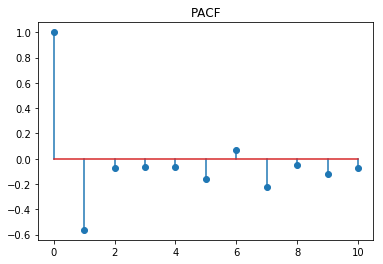

KEEP H0, no unit root in 1% alpha
stat =  -8.27619486306
p_val =  4.6495501616e-13
alpha_threshold: {'1%': -3.4545326116460702, '5%': -2.8721859575020017, '10%': -2.5724428548618659}
------------------------
------------------------
price_USDT_USD_d 



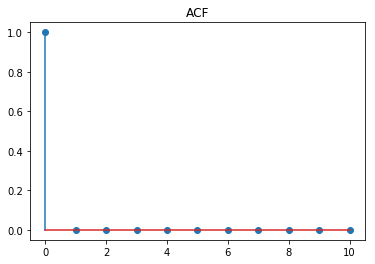

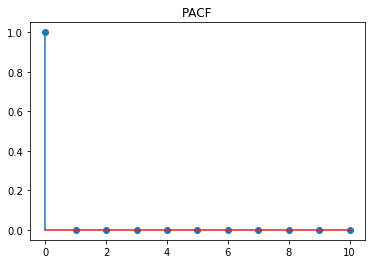

KEEP H0, no unit root in 1% alpha
stat =  -40.6748672855
p_val =  0.0
alpha_threshold: {'1%': -3.4343097809950986, '5%': -2.8632890172254655, '10%': -2.5677011356149544}
------------------------
------------------------
price_USDS_USD_d 



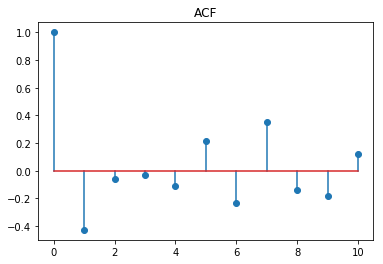

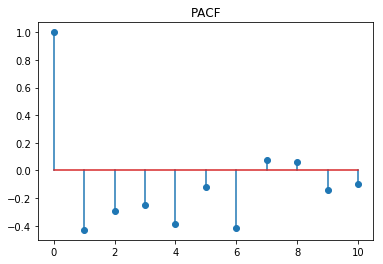

KEEP H0, no unit root in 1% alpha
stat =  -10.5349299735
p_val =  8.95192271665e-19
alpha_threshold: {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.5792569759999999}
------------------------
------------------------
price_USDC_USD_d 



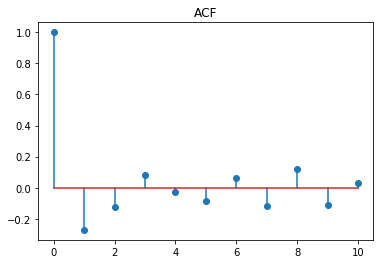

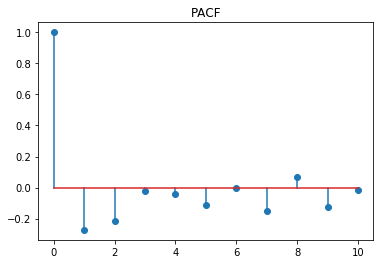

KEEP H0, no unit root in 1% alpha
stat =  -13.4971588548
p_val =  3.02615597043e-25
alpha_threshold: {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.5749446537396121}
------------------------
------------------------
price_PAX_USD_d 



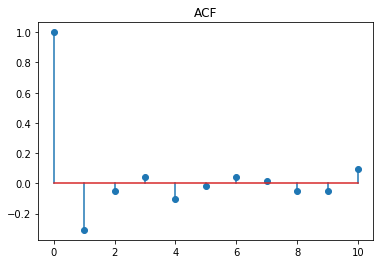

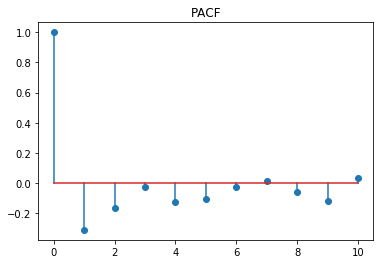

KEEP H0, no unit root in 1% alpha
stat =  -12.7877711758
p_val =  7.18499032309e-24
alpha_threshold: {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.5751677501826151}
------------------------
------------------------
price_TUSD_USD_d 



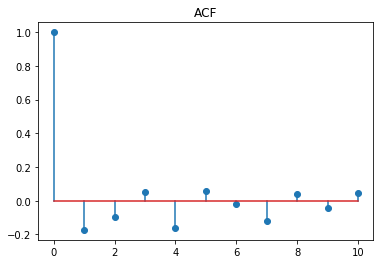

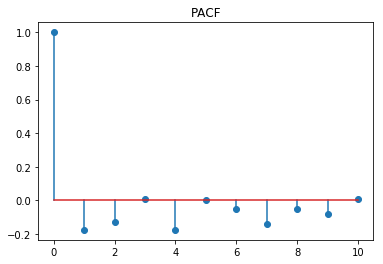

KEEP H0, no unit root in 1% alpha
stat =  -8.46899897623
p_val =  1.49531839633e-13
alpha_threshold: {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}
------------------------
------------------------
price_BTC_USD_d 



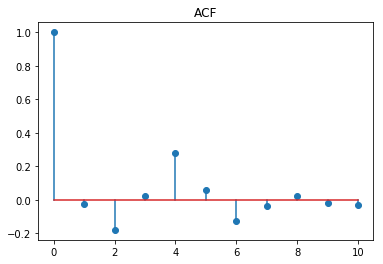

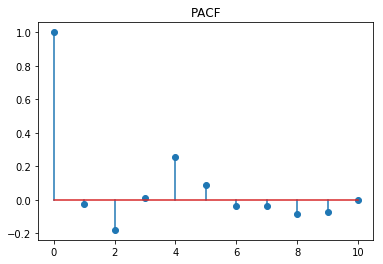

KEEP H0, no unit root in 1% alpha
stat =  -15.8499425556
p_val =  9.47459285751e-29
alpha_threshold: {'1%': -3.4336403292634223, '5%': -2.862993486306054, '10%': -2.5675437746521554}
------------------------


In [11]:
for name in table_names:
    if name[-1] == 'd':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.stationary_test( test_df_map[ name ], True ) ['adf']
        if a[0] < a[4]['1%']:
            print('KEEP H0, no unit root in 1% alpha')
        
        print('stat = ', a[0])
        print('p_val = ', a[1])
        print('alpha_threshold:', a[4])
        print('------------------------')

SPY 500 DAILY LEVEL

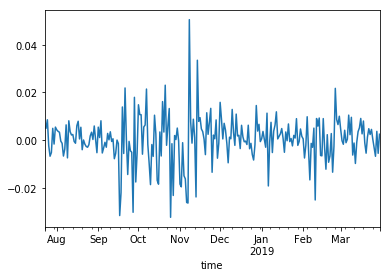

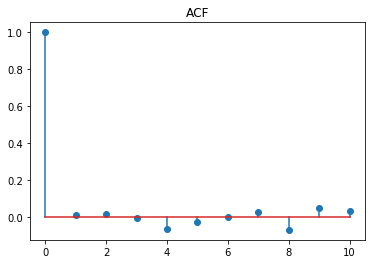

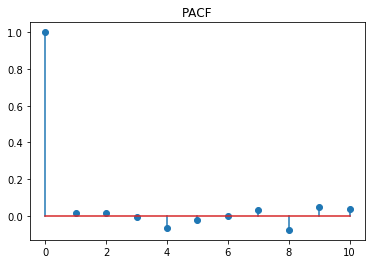

{'acf': array([ 1.        ,  0.01409784,  0.01642874, -0.00668981, -0.0639117 ,
        -0.02310717, -0.00101982,  0.03024942, -0.06848238,  0.04944746,
         0.03264775]),
 'adf': (-15.50204941407668,
  2.4086298096339375e-28,
  0,
  249,
  {'1%': -3.4568881317725864,
   '10%': -2.5729936189738876,
   '5%': -2.8732185133016057},
  -1481.7488424529979),
 'pacf': array([ 1.        ,  0.01415446,  0.01636416, -0.00723665, -0.06505995,
        -0.02165588,  0.00171981,  0.03121997, -0.07648195,  0.04981085,
         0.03539803])}

In [12]:
SPY = pd.read_csv('SPY.csv')
SPY.columns = ['time', 'open', 'high', 'low', 'close','adj_close', 'vol']
SPY['return'] = SPY['close'].pct_change()
SPY.index = pd.to_datetime(SPY['time'])

SPY['return'].plot()
plt.show()
analyst.stationary_test(SPY,True)

### Return Daily seasonal decompo

------------------------
price_DAI_USD_h 



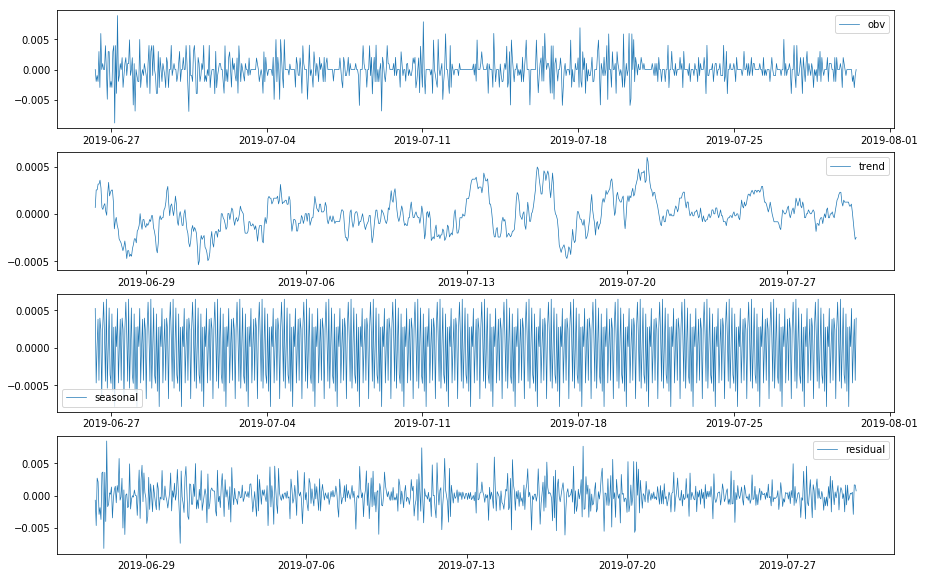

stats = -8.19161166803 Alpha = {'1%': -3.4385299921076995, '5%': -2.8651505256266865, '10%': -2.5686925716879871}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_GUSD_USD_h 



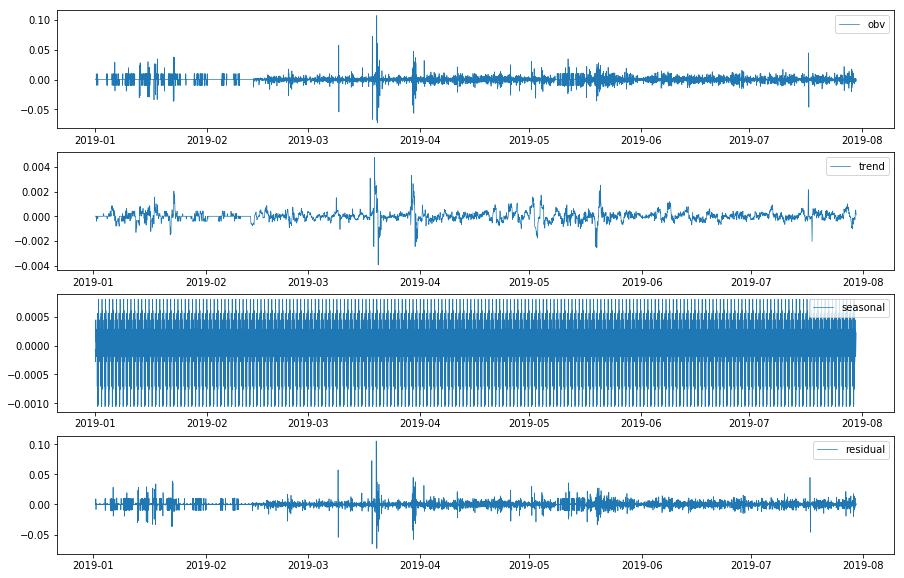

stats = -19.1791301374 Alpha = {'1%': -3.4316522779278373, '5%': -2.8621154666284063, '10%': -2.5670763214801435}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDT_USD_h 



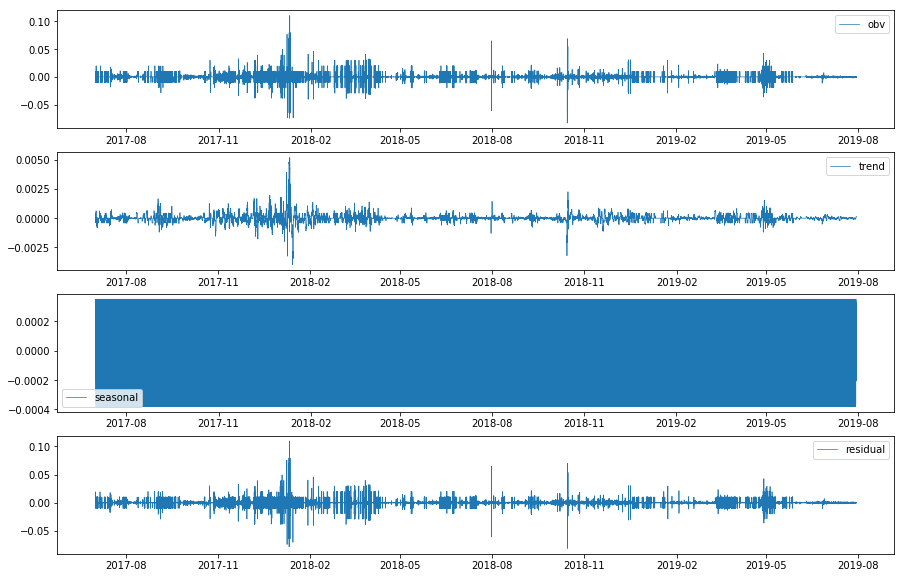

stats = -23.4557496297 Alpha = {'1%': -3.4307096889077844, '5%': -2.8616989689806949, '10%': -2.5668546149966978}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDS_USD_h 



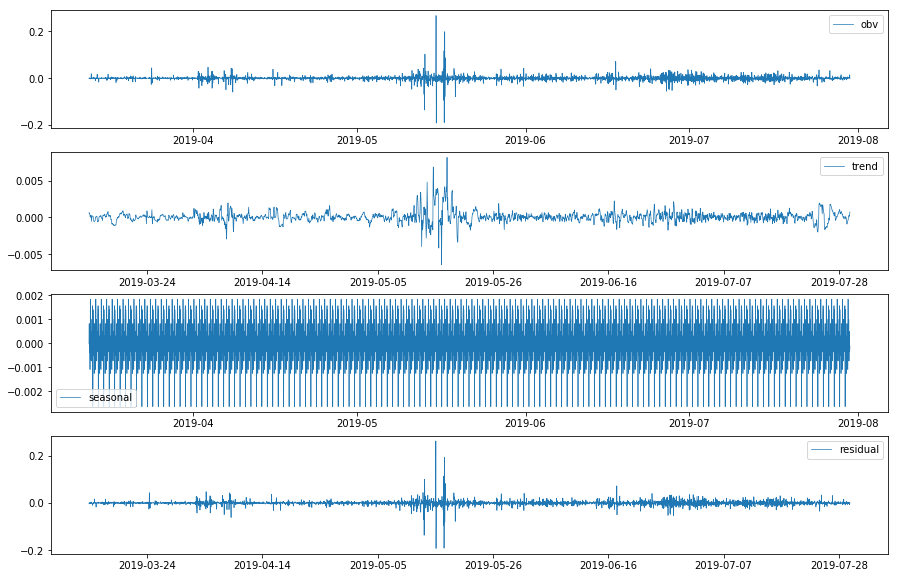

stats = -16.7603825049 Alpha = {'1%': -3.4323200060740411, '5%': -2.8624104329204227, '10%': -2.567233349059288}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDC_USD_h 



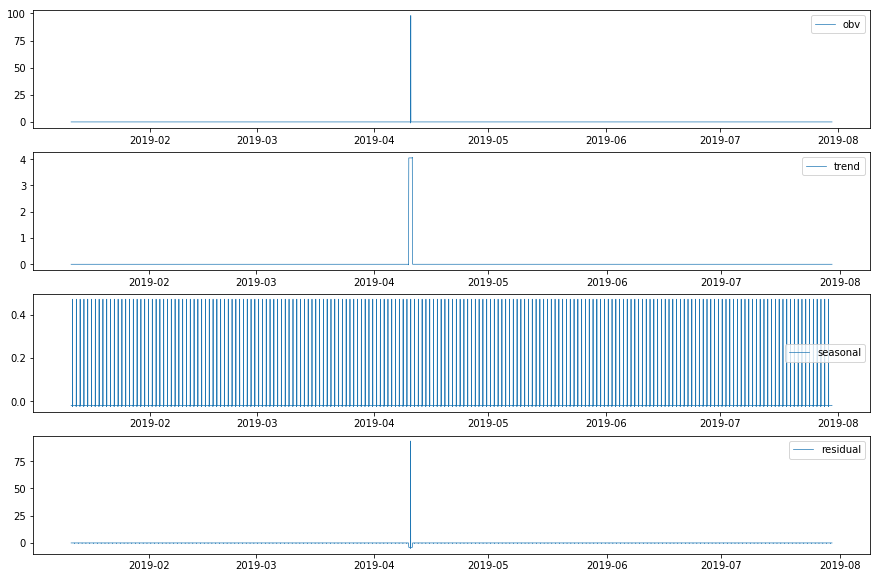

stats = -70.0361606625 Alpha = {'1%': -3.431711097447145, '5%': -2.8621414525757491, '10%': -2.5670901548483767}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_PAX_USD_h 



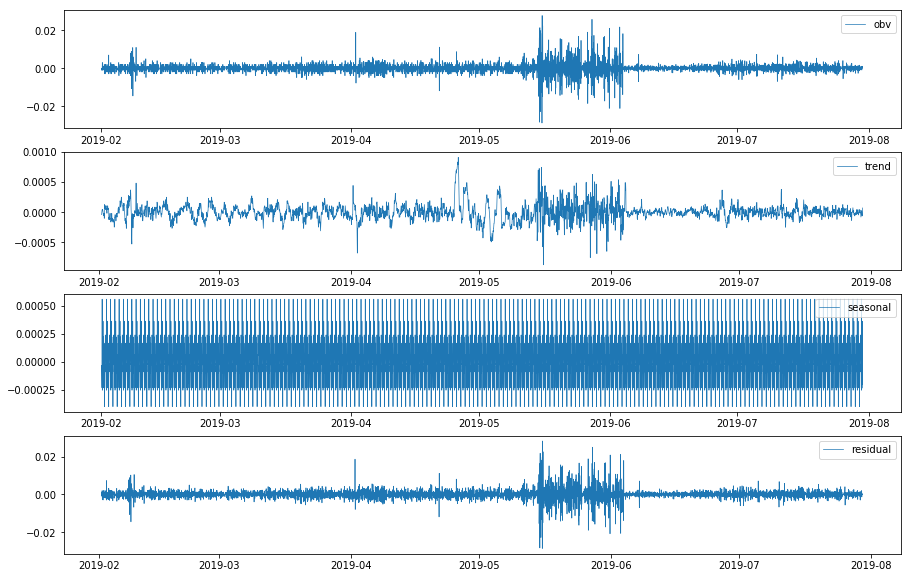

stats = -17.0045022384 Alpha = {'1%': -3.4318784338660824, '5%': -2.8622153775300201, '10%': -2.5671295085622763}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_TUSD_USD_h 



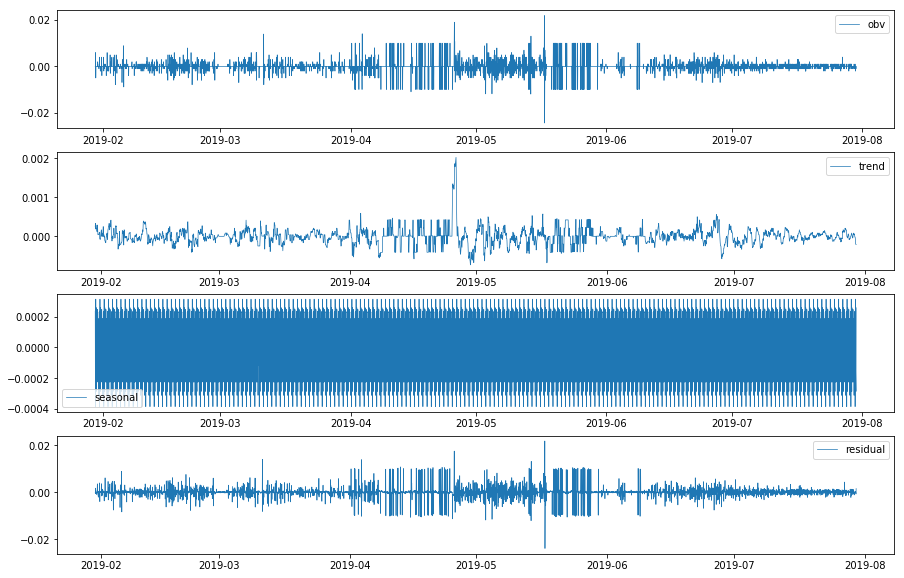

stats = -15.1629284553 Alpha = {'1%': -3.4318621755499645, '5%': -2.8622081952035137, '10%': -2.5671256850426554}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_BTC_USD_h 



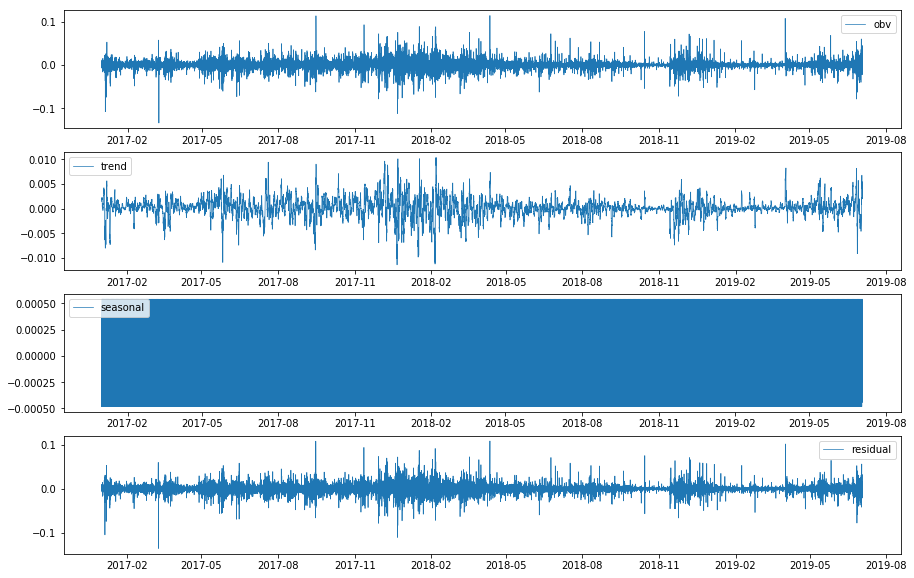

stats = -29.5147111046 Alpha = {'1%': -3.4306485241176565, '5%': -2.8616719378010846, '10%': -2.5668402267764288}

Residual is stable in 99% confid. interval
------------------------


In [13]:
for name in table_names:
    if name[-1] == 'h':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.seasonality_return_decomp( test_df_map[ name ], 24 , True )        
        print('------------------------')
#a = analyst.seasonality_decomp( test_df_map['price_USDS_USD_h'], freq, True )
#freq is the freq. of given data compare with target interval
#i.e hourly vs daily, then freq is 24

### Return weekly seasonal decompo

------------------------
price_GUSD_USD_d 



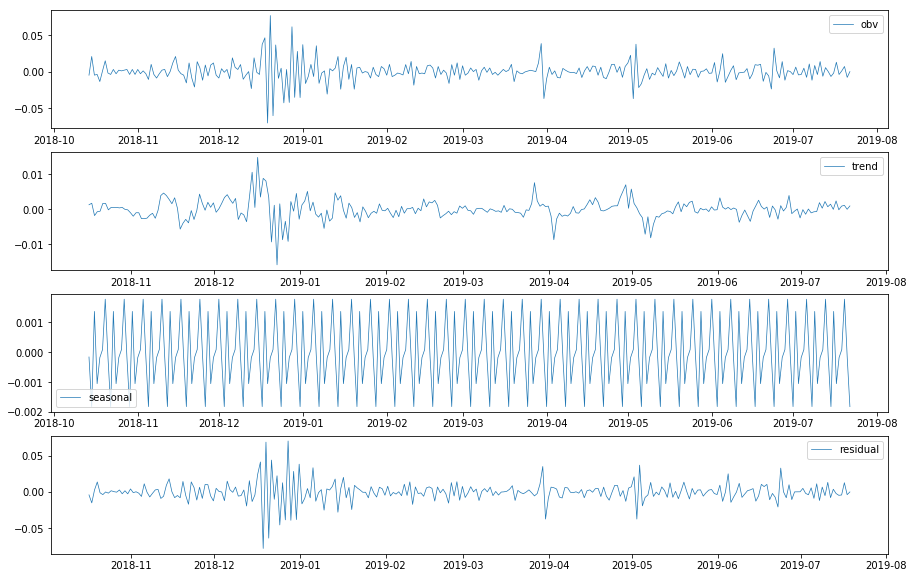

stats = -8.27619486306 Alpha = {'1%': -3.4545326116460702, '5%': -2.8721859575020017, '10%': -2.5724428548618659}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDT_USD_d 



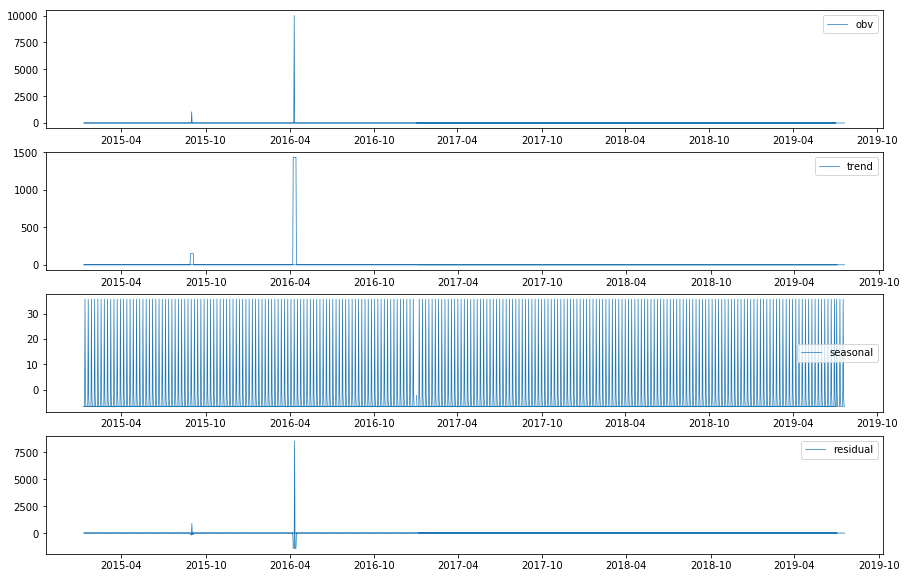

stats = -40.6748672855 Alpha = {'1%': -3.4343097809950986, '5%': -2.8632890172254655, '10%': -2.5677011356149544}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDS_USD_d 



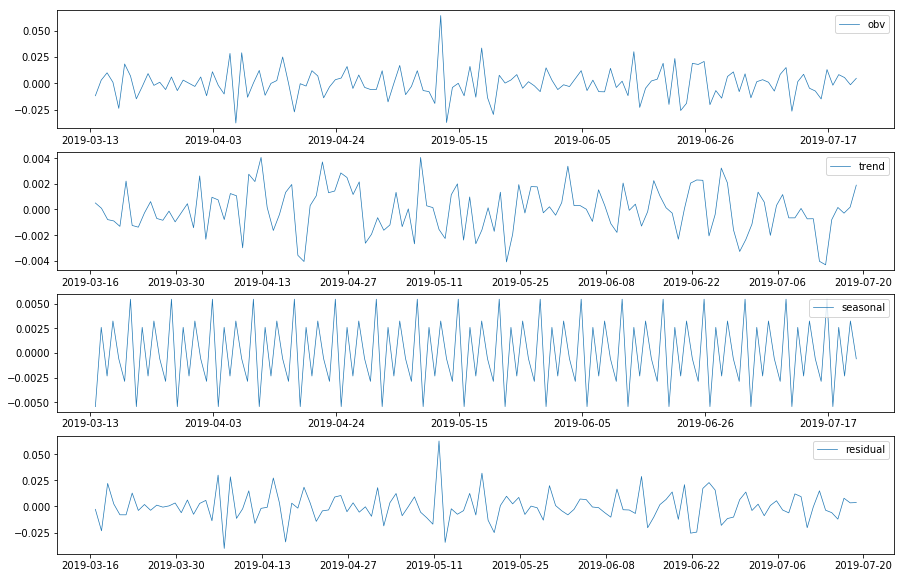

stats = -10.5349299735 Alpha = {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.5792569759999999}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDC_USD_d 



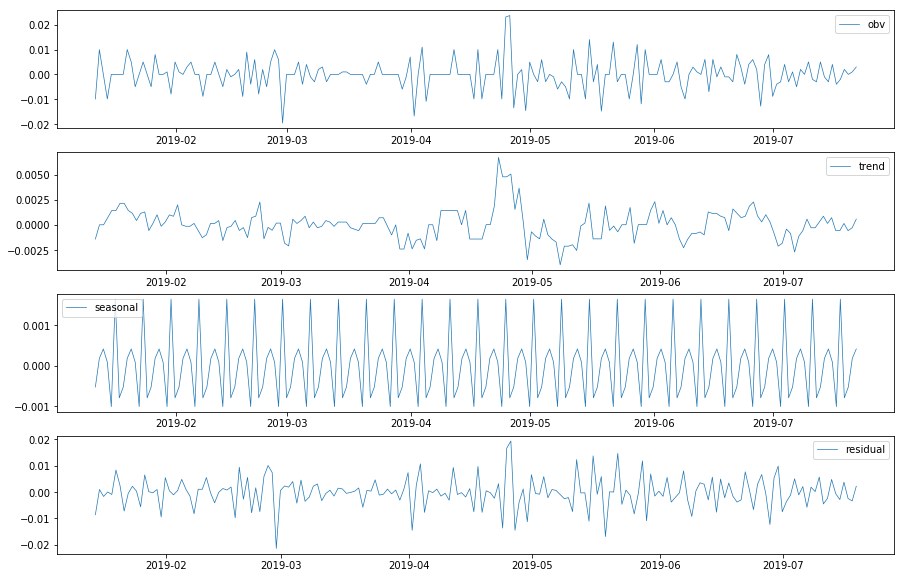

stats = -13.4971588548 Alpha = {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.5749446537396121}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_PAX_USD_d 



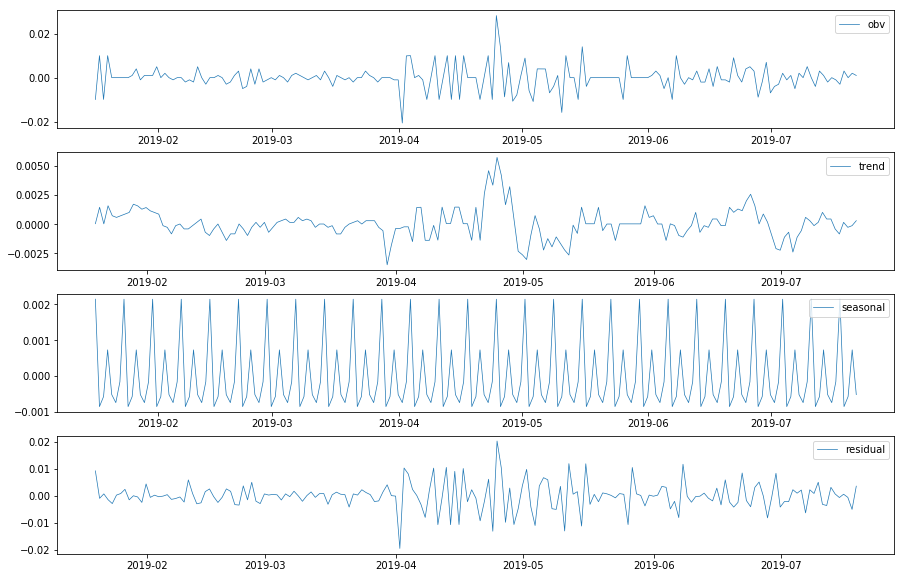

stats = -12.7877711758 Alpha = {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.5751677501826151}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_TUSD_USD_d 



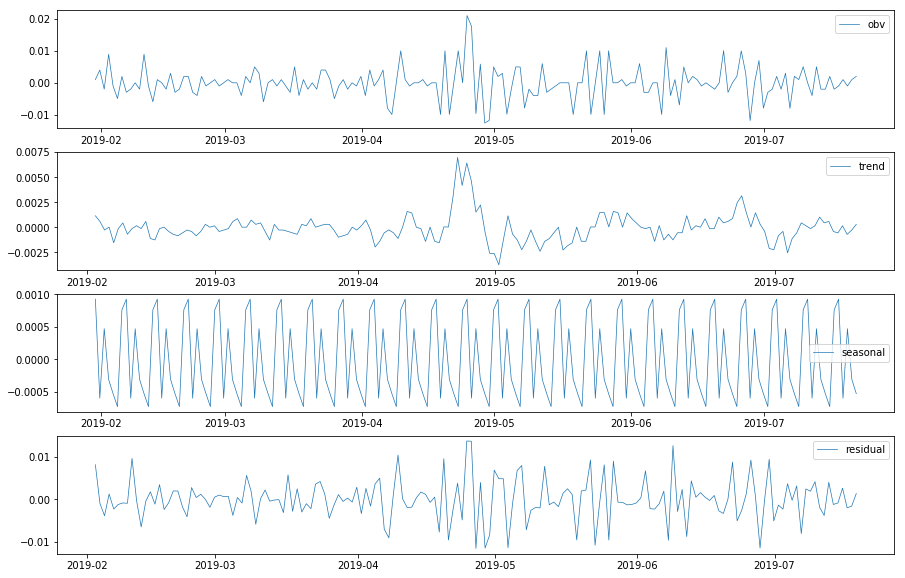

stats = -8.46899897623 Alpha = {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_BTC_USD_d 



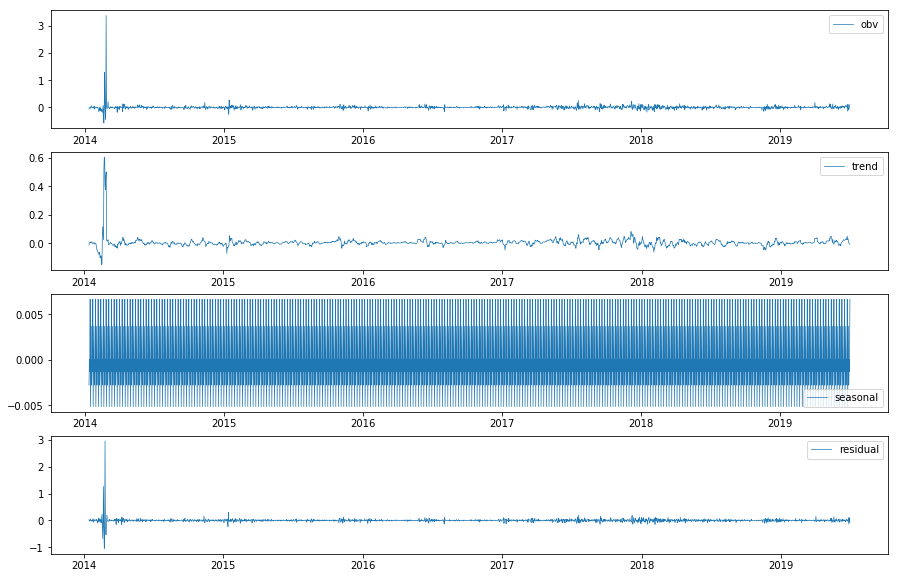

stats = -15.8499425556 Alpha = {'1%': -3.4336403292634223, '5%': -2.862993486306054, '10%': -2.5675437746521554}

Residual is stable in 99% confid. interval
------------------------


In [14]:
for name in table_names:
    if name[-1] == 'd' and name != 'price_DAI_USD_d':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.seasonality_return_decomp( test_df_map[ name ], 7 , True )        
        print('------------------------')

### close price daily seasonal decompo

------------------------
price_DAI_USD_h 



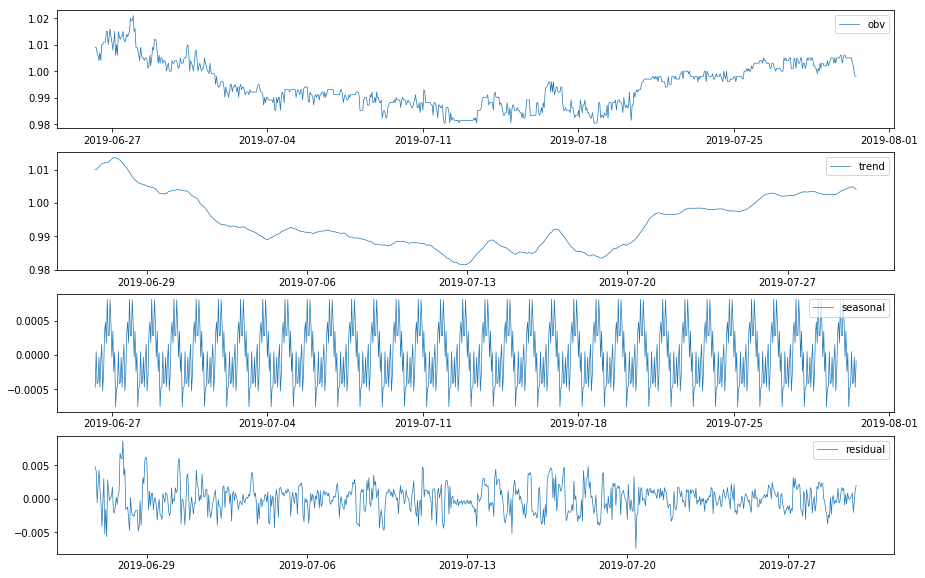

stats = -8.19161166803 Alpha = {'1%': -3.4385299921076995, '5%': -2.8651505256266865, '10%': -2.5686925716879871}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_GUSD_USD_h 



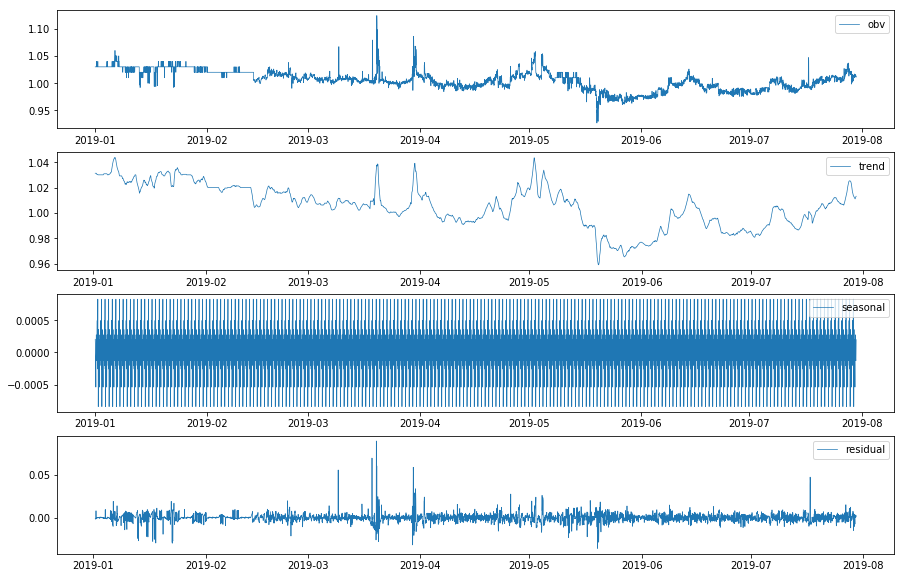

stats = -19.1791301374 Alpha = {'1%': -3.4316522779278373, '5%': -2.8621154666284063, '10%': -2.5670763214801435}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDT_USD_h 



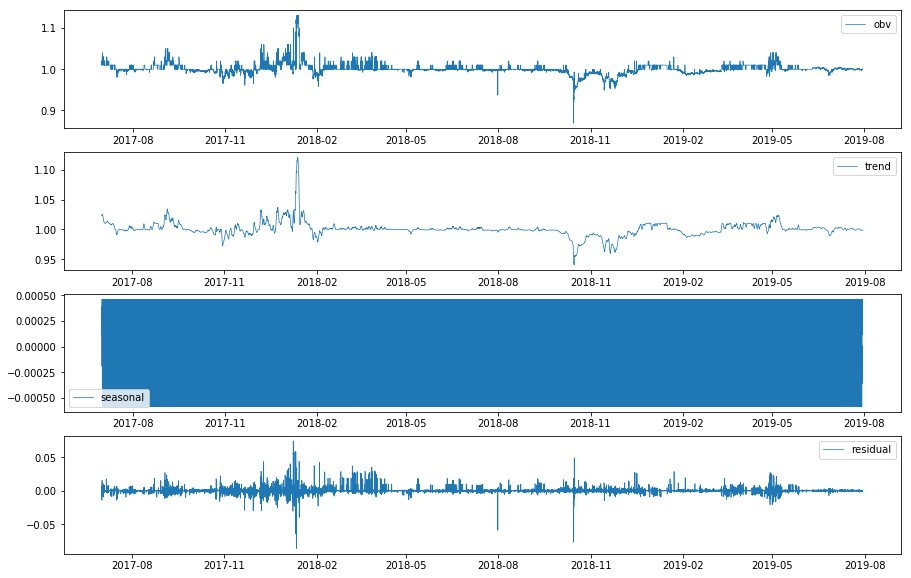

stats = -23.4557496297 Alpha = {'1%': -3.4307096889077844, '5%': -2.8616989689806949, '10%': -2.5668546149966978}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDS_USD_h 



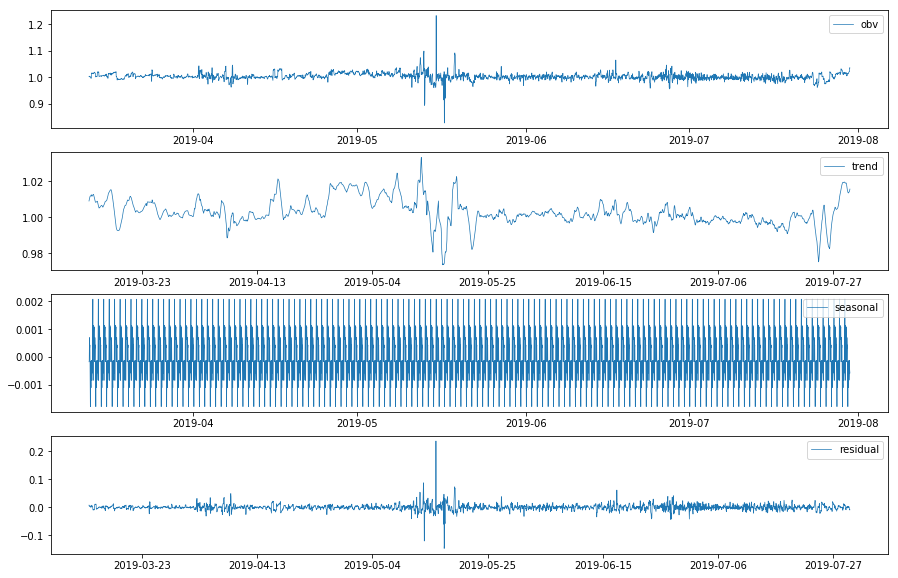

stats = -16.7603825049 Alpha = {'1%': -3.4323200060740411, '5%': -2.8624104329204227, '10%': -2.567233349059288}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDC_USD_h 



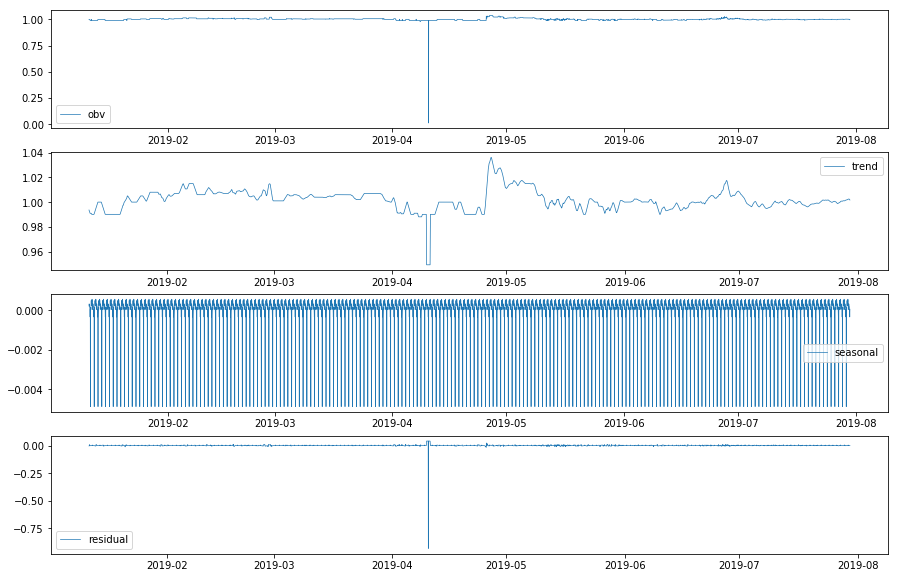

stats = -70.0361606625 Alpha = {'1%': -3.431711097447145, '5%': -2.8621414525757491, '10%': -2.5670901548483767}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_PAX_USD_h 



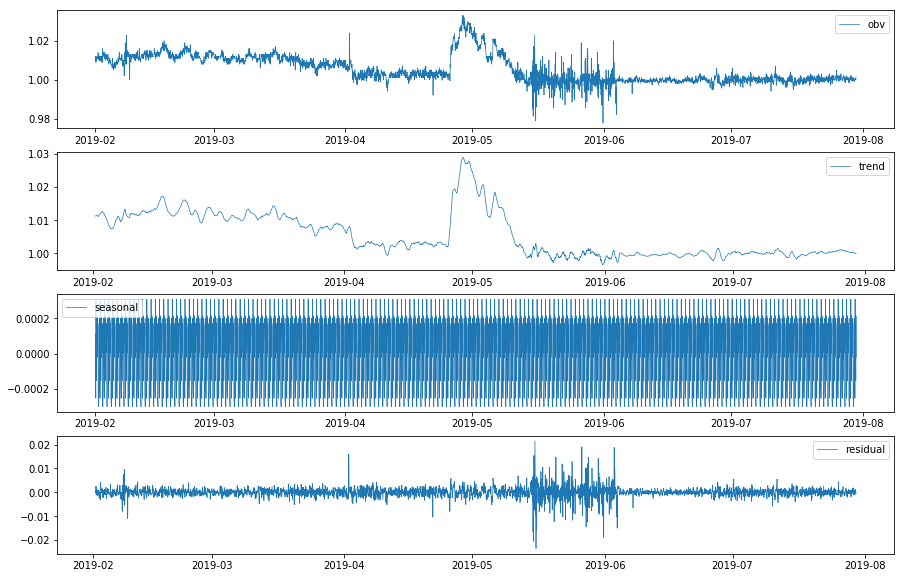

stats = -17.0045022384 Alpha = {'1%': -3.4318784338660824, '5%': -2.8622153775300201, '10%': -2.5671295085622763}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_TUSD_USD_h 



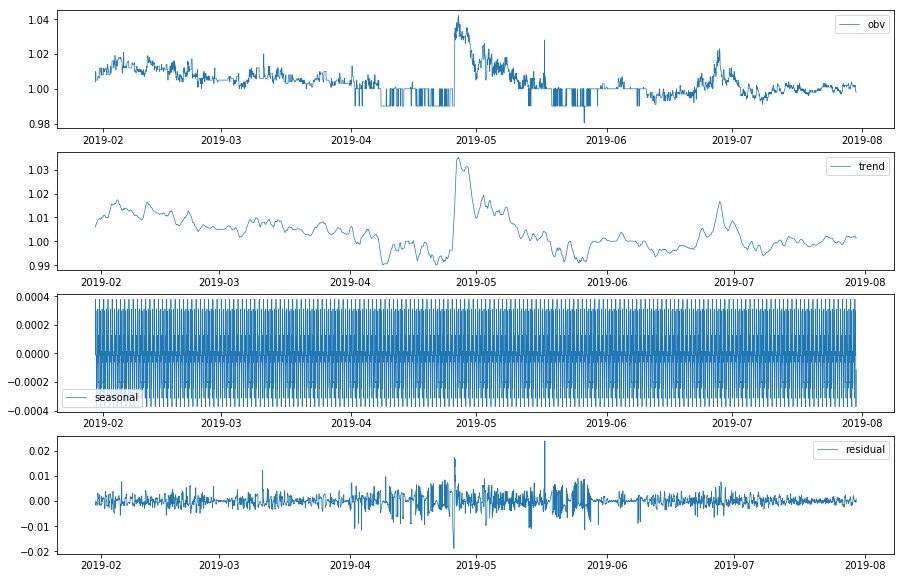

stats = -15.1629284553 Alpha = {'1%': -3.4318621755499645, '5%': -2.8622081952035137, '10%': -2.5671256850426554}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_BTC_USD_h 



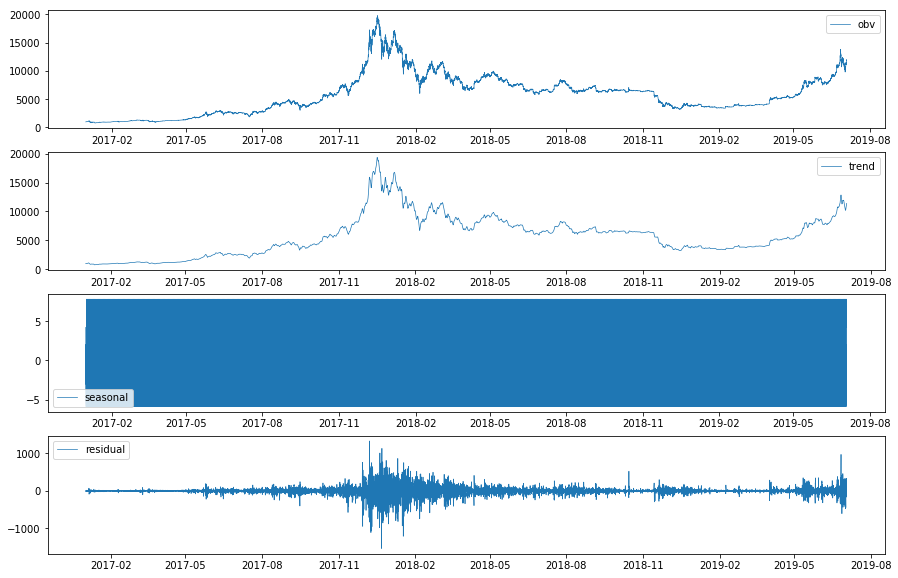

stats = -29.5147111046 Alpha = {'1%': -3.4306485241176565, '5%': -2.8616719378010846, '10%': -2.5668402267764288}

Residual is stable in 99% confid. interval
------------------------


In [15]:
for name in table_names:
    if name[-1] == 'h':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.seasonality_price_decomp( test_df_map[ name ], 24 , True )        
        print('------------------------')
#a = analyst.seasonality_decomp( test_df_map['price_USDS_USD_h'], freq, True )
#freq is the freq. of given data compare with target interval
#i.e hourly vs daily, then freq is 24

### Close price weekly seasonal decompo

------------------------
price_GUSD_USD_d 



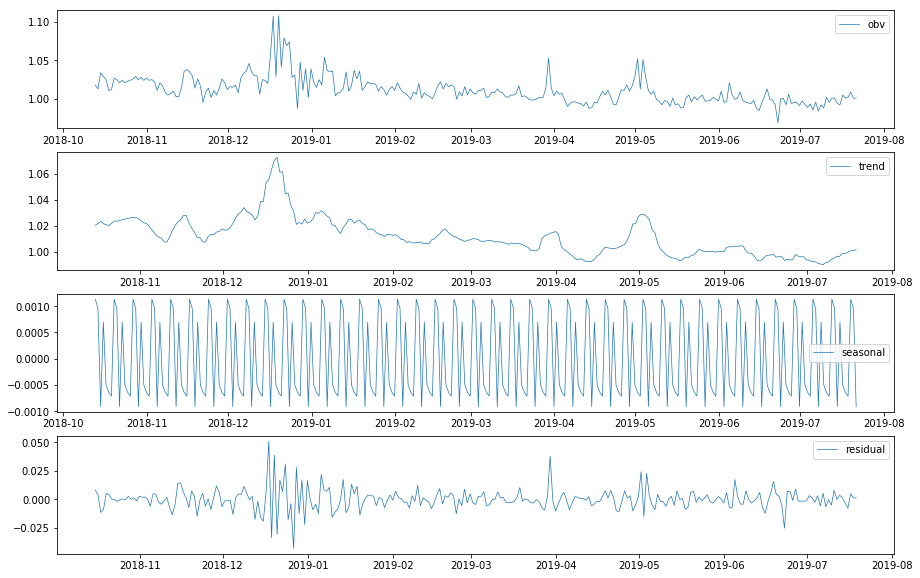

stats = -8.27619486306 Alpha = {'1%': -3.4545326116460702, '5%': -2.8721859575020017, '10%': -2.5724428548618659}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDT_USD_d 



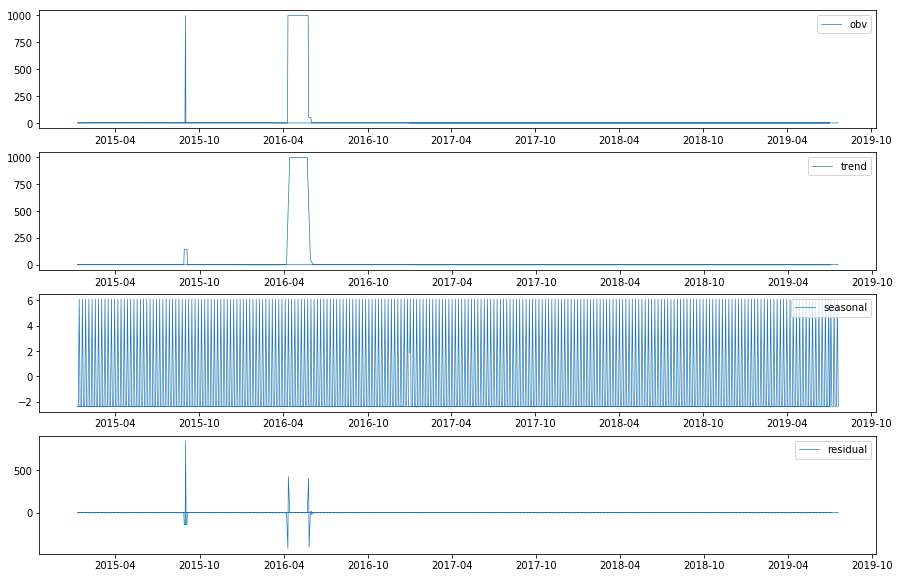

stats = -40.6748672855 Alpha = {'1%': -3.4343097809950986, '5%': -2.8632890172254655, '10%': -2.5677011356149544}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDS_USD_d 



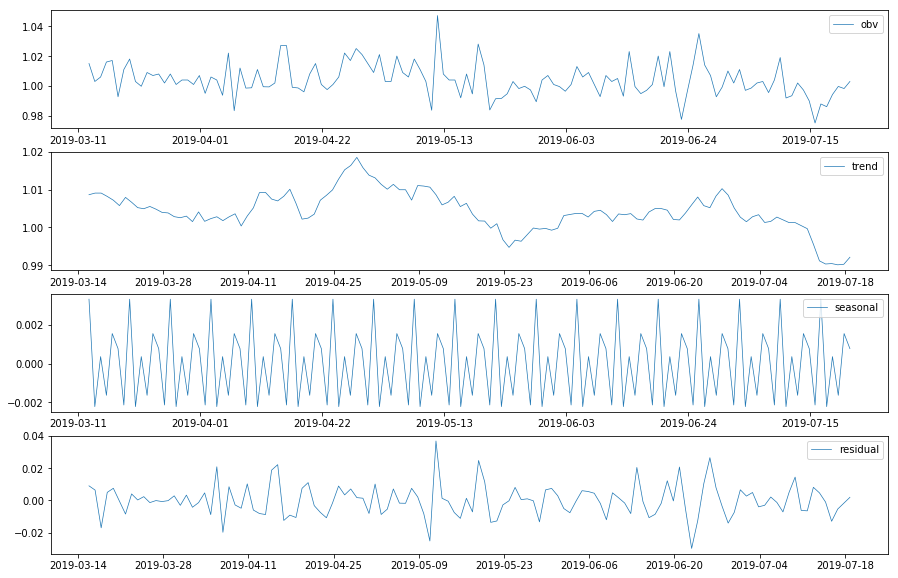

stats = -10.5349299735 Alpha = {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.5792569759999999}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_USDC_USD_d 



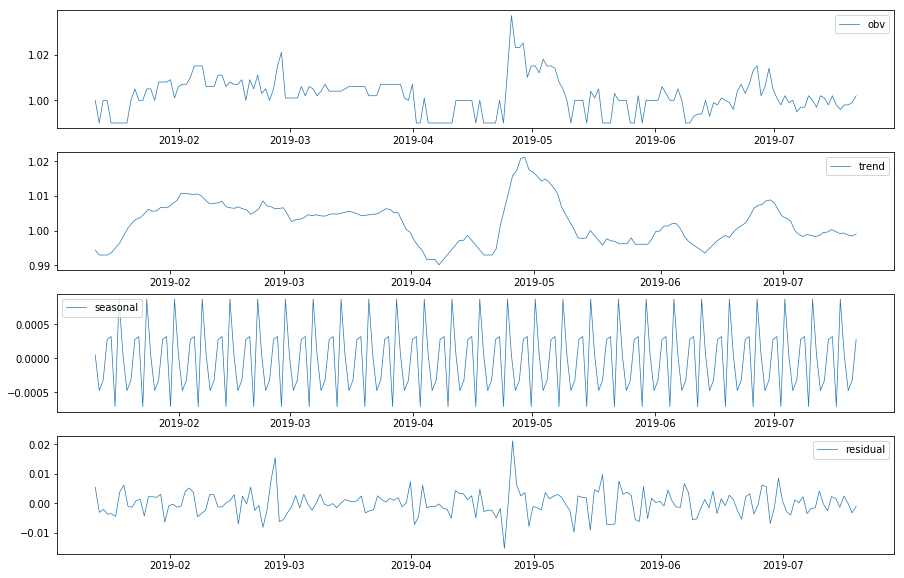

stats = -13.4971588548 Alpha = {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.5749446537396121}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_PAX_USD_d 



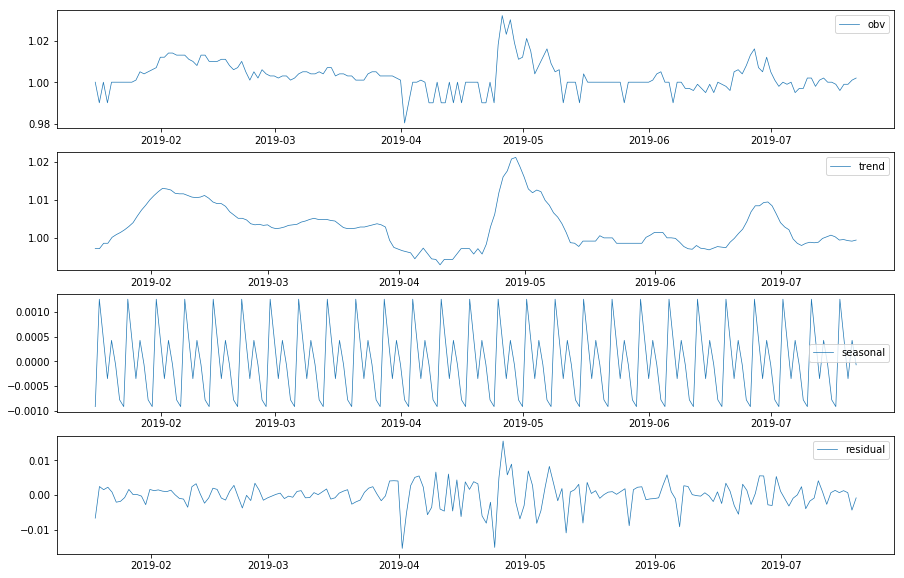

stats = -12.7877711758 Alpha = {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.5751677501826151}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_TUSD_USD_d 



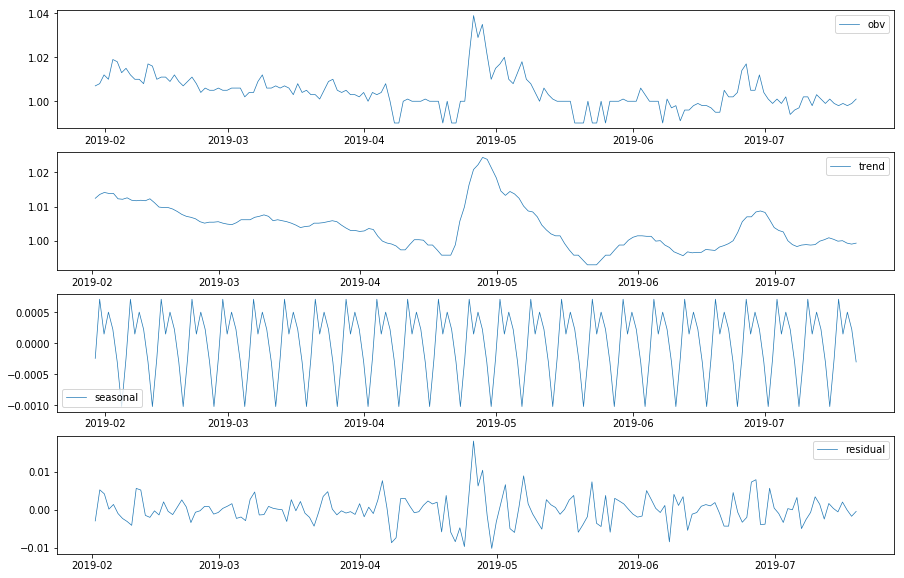

stats = -8.46899897623 Alpha = {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}

Residual is stable in 99% confid. interval
------------------------
------------------------
price_BTC_USD_d 



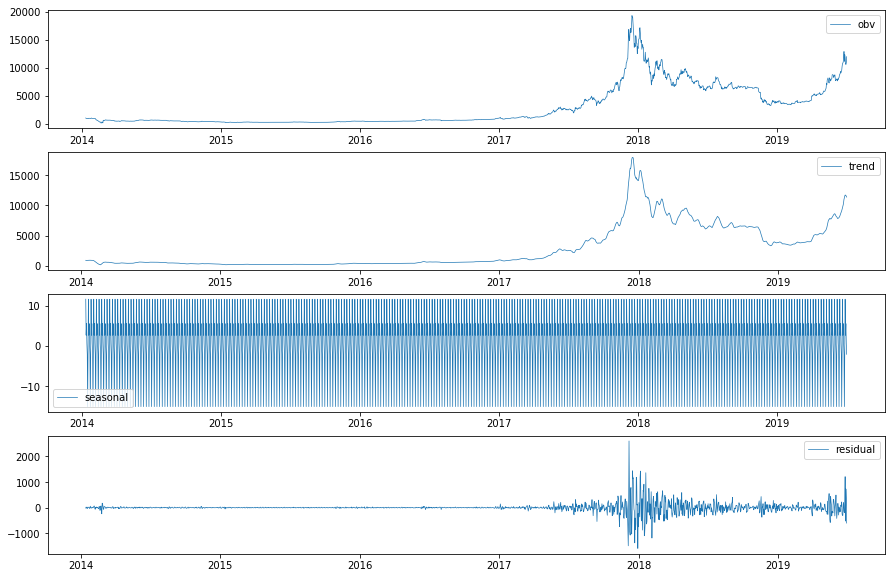

stats = -15.8499425556 Alpha = {'1%': -3.4336403292634223, '5%': -2.862993486306054, '10%': -2.5675437746521554}

Residual is stable in 99% confid. interval
------------------------


In [16]:
for name in table_names:
    if name[-1] == 'd' and name != 'price_DAI_USD_d':
        print('------------------------')
        print('{} \n'.format(name))
        a = analyst.seasonality_price_decomp( test_df_map[ name ], 7 , True )        
        print('------------------------')

# -----------------------------------------------------test part below------------------------------------

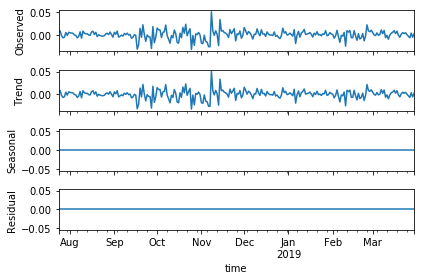

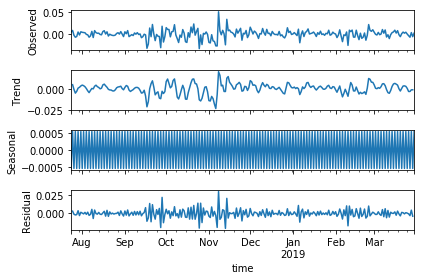

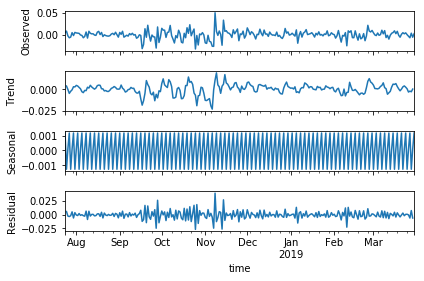

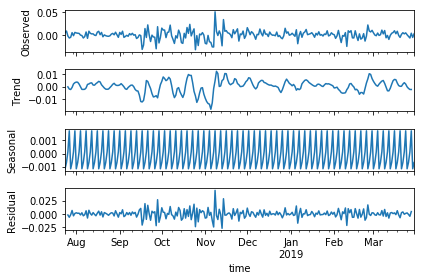

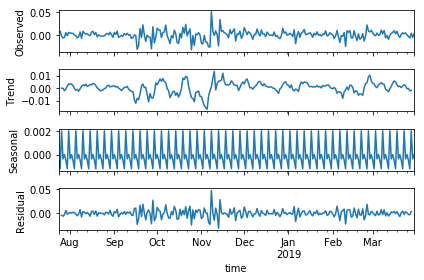

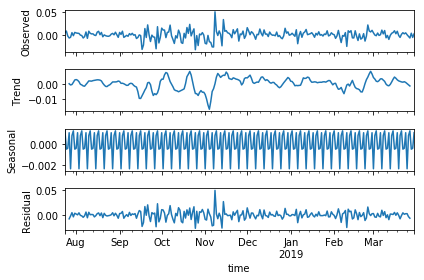

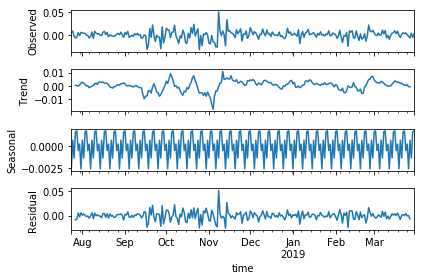

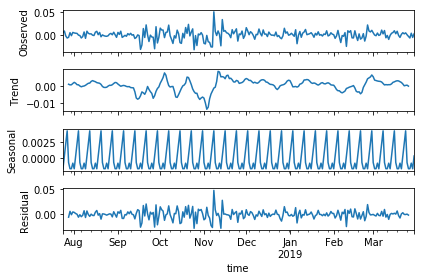

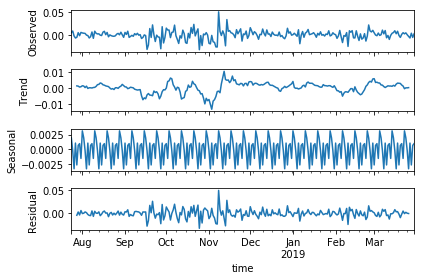

In [17]:
series = pd.Series(SPY['return'])
series = series[1::]

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

for i in range(1,10):
    result = seasonal_decompose(series, model='additive', freq=i)
    result.plot()
    pyplot.show()